In [1]:
import pandas as pd
import numpy as np
import bats
import matplotlib.pyplot as plt
from bats.visualization.plotly import ScatterVisualization
import scipy.spatial.distance as distance

In [2]:
df1 = pd.read_csv("original_dataset_rips.csv",header = None)

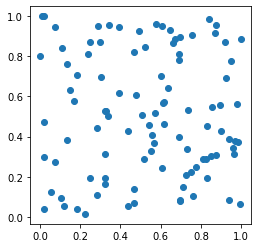

In [31]:
fig2 = plt.scatter(df1.iloc[:,0], df1.iloc[:,1])
fig2.axes.set_aspect('equal')
plt.savefig('original_dataset_rips.pdf', format='pdf', dpi=1200)

In [4]:
df2 = pd.read_csv("optimized_dataset_rips.csv",header = None)

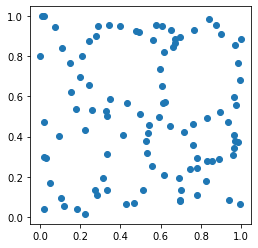

In [32]:
fig2 = plt.scatter(df2.iloc[:,0], df2.iloc[:,1])
fig2.axes.set_aspect('equal')
plt.savefig('optimized_dataset_rips.pdf', format='pdf', dpi=1200)

## Compute PH and view PD

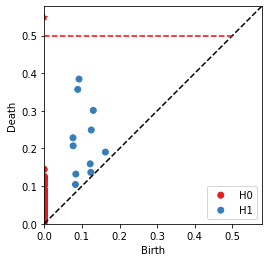

In [6]:
X = np.array(df2)

DX = distance.squareform(distance.pdist(X))
rX = bats.enclosing_radius(bats.Matrix(DX))

F = bats.RipsFiltration(bats.Matrix(DX), rX, 2)
R = bats.reduce(F, bats.F2()) # reduce with F2 coefficients
ps = []
for d in range(R.maxdim()):
    ps.extend(R.persistence_pairs(d))

fig, ax = bats.persistence_diagram(ps, tmax = 0.5)

In [7]:
ps_len = []
for p in ps:
    ps_len.append(p.length())
    if p.length()>0 and p.dim()>0:
        print(p)


1 : (0.0764842,0.228458) <82,1587>
1 : (0.0769293,0.207061) <83,1044>
1 : (0.0830713,0.104386) <98,79>
1 : (0.084013,0.132071) <103,230>
1 : (0.0890697,0.357047) <121,7138>
1 : (0.0924711,0.384417) <126,9141>
1 : (0.122137,0.159243) <205,394>
1 : (0.123856,0.136692) <209,271>
1 : (0.125033,0.249171) <213,2167>
1 : (0.13028,0.301233) <234,4076>
1 : (0.162634,0.190485) <322,802>


### find the index of the H1 generator with maximum length

In [8]:
# inf is the maixmum
ps_len.index(max(ps_len))

0

In [9]:
ps_len.index(max(ps_len[1:]))

141

In [10]:
RCC2 = R.reduced_complex()

In [11]:
RCC2

In [12]:
# find representative stored in sparse vector of BATs
R.representative(ps[5])

In [13]:
R.representative(ps[141]).nnz()

24

In [14]:
R.remove_extra_cycles?

In [20]:
FC = F.complex()
FC

In [ ]:
RC = bats.ReducedChainComplex(R, bats.F2())
r = RC.get_preferred_representative(1, 1)
r

## View the largest H1 generator

In [29]:
X = np.array(df2)
DX = distance.squareform(distance.pdist(X))
rX = bats.enclosing_radius(bats.Matrix(DX))

zero_skeleton = bats.RipsComplex(bats.Matrix(DX), 0.2, 2)
fig = ScatterVisualization(zero_skeleton, pos=X)
fig.update_layout(width=600, height=600, showlegend=False)
fig.show()

In [ ]:
fig.write_image("fig1.pdf")

In [30]:
rX

0.687306425688718

Draw the generator with the largest length

In [27]:
fig.reset() # resets figure to have no generators
fig.show_chain(R.representative(ps[141]), color='red')
fig.show()

In [17]:
np.random.seed(0)
def gen_fig_8(n, r=1.0, sigma=0.1):
    X = np.random.randn(n,2)
    X = r * X / np.linalg.norm(X, axis=1).reshape(-1,1)
    X += sigma*np.random.randn(n, 2) + np.random.choice([-1/np.sqrt(2),1/np.sqrt(2)], size=(n,1))
    return X

n = 200
X = gen_fig_8(n)
pdist = distance.squareform(distance.pdist(X, 'euclidean'))

R = bats.RipsComplex(bats.Matrix(pdist), 0.5, 2)
fig = ScatterVisualization(R, pos=X)
fig.update_layout(width=600, height=600, showlegend=False)
fig.show()

In [18]:
fig.show_generators(1)
fig.show()

In [20]:
RC = bats.ReducedChainComplex(R, bats.F2())
r = RC.get_preferred_representative(1, 1)
fig.reset()
fig.show_chain(r, color='blue')
fig.show()

In [22]:
RC.remove_extra_cycles()
r = RC.get_preferred_representative(1, 1)
fig.reset()
fig.show_chain(r, color='blue')
fig.show()